In [1]:
import sys
sys.path.append('../')

from FeatureModels import *
from xgboost import XGBRegressor

In [14]:
path = '../data/'
df = pd.read_csv(f"{path}pm25_{sensor}{fill}.csv", sep = ';', index_col = ['Date'], parse_dates = ['Date'], usecols = ['Date', district])

In [21]:
sum19 = df['2019-05-01' : '2019-07-12']
sum20 = df['2020-05-01' : '2020-08-01']
sum21 = df['2021-05-01' : '2021-08-01']
sum22 = df['2022-05-01' : '2022-08-01']
sum23 = df['2023-05-03' : '2023-08-05']

<AxesSubplot:xlabel='Date'>

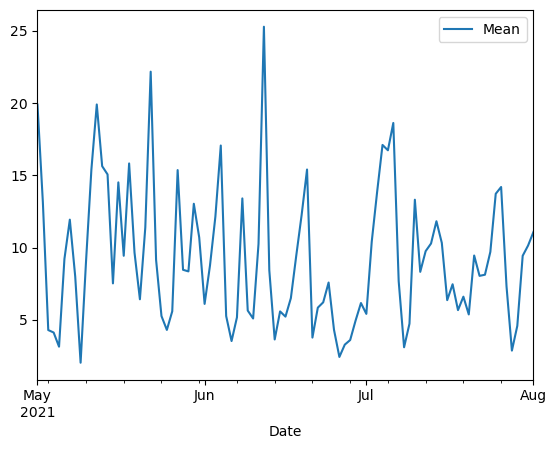

In [22]:
sum21.plot()

<AxesSubplot:xlabel='Date'>

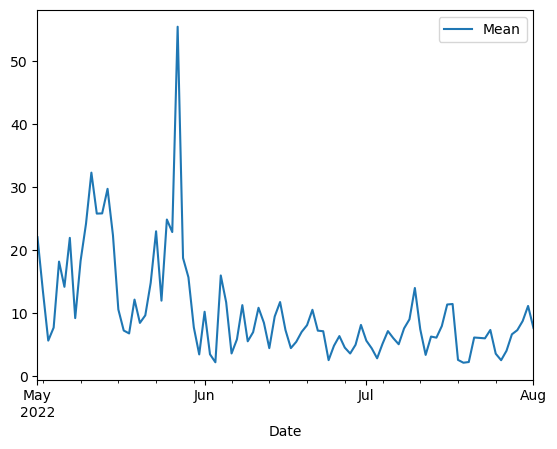

In [23]:
sum22.plot()

<AxesSubplot:xlabel='Date'>

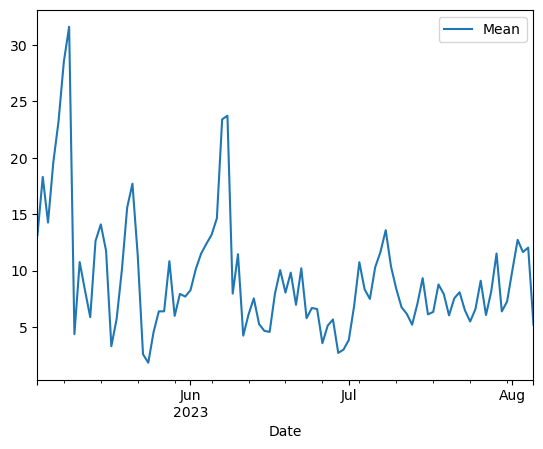

In [24]:
sum23.plot()

<AxesSubplot:>

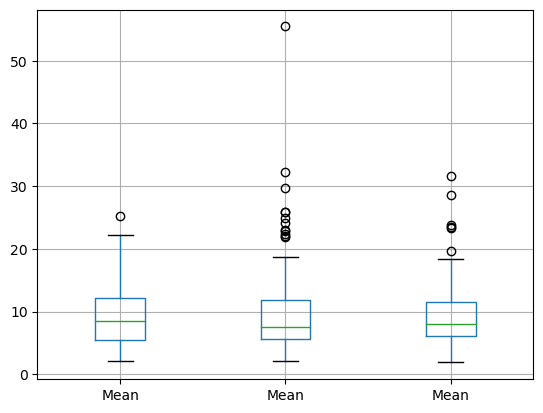

In [58]:
pd.concat([sum21, sum22, sum23], axis = 1).boxplot()

In [32]:
sum21.std()['Mean'], sum22.std()['Mean'], sum23.std()['Mean']

(4.830316982891778, 8.252481782066978, 5.344477175757686)

In [33]:
sum21.mean()['Mean'], sum22.mean()['Mean'], sum23.mean()['Mean']

(9.264731182795702, 10.367956989247315, 9.406315789473684)

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2 

In [2]:
sensor = 's'
fill = '_fill'

district = 'Mean'

#savePath = 'Results/Results RF large periods.xlsx'

In [5]:
params = { 
    'n_estimators': np.linspace(10, 1000, 6).round().astype('int'),
    'max_depth' : [2, 3, 4],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.5, 0.8],
    'subsample': [0.5, 1.0],
}
params

{'n_estimators': array([  10,  208,  406,  604,  802, 1000]),
 'max_depth': [2, 3, 4],
 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.8],
 'subsample': [0.5, 1.0]}

## Модели, обученные за года

In [5]:
model = XGBRegressor(random_state = 100)

In [ ]:
# Срез данных от begin до end
begin, end = '2019-01-01', '2024-03-19'

for season in ['winters', 'springs', 'summers', 'autumns']:
    ModelProcessing(model, sensor, fill, district, begin, end, seasonModel = '', season_test = season, params = params, gridSearch = True, paramDependencies = ['n_estimators', 'learning_rate'], plotRes = False, featImp = False)#, savePath = 'Results/Results xgb.xlsx')

## Сезонные модели

,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 406, 'subsample': 0.5}",,,
MSE,179.61,921.52,362.31
MAE,9.55,21.77,13.98
MAPE,0.30,0.73,0.61
R2,0.92,0.59,0.83


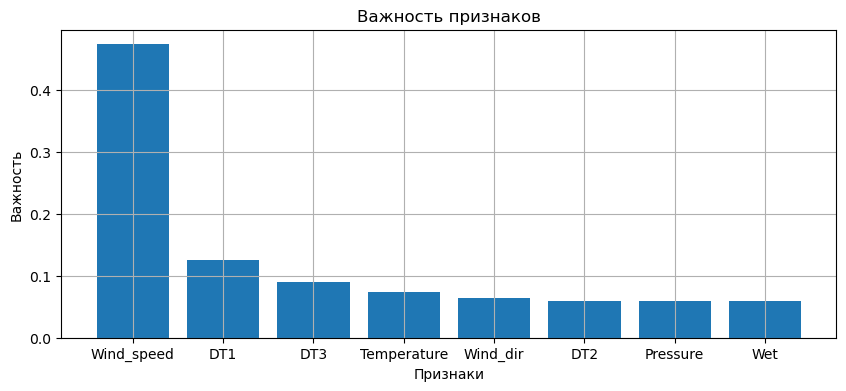

,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 802, 'subsample': 0.5}",,,
MSE,7.30,56.23,51.32
MAE,2.05,5.65,5.15
MAPE,0.19,0.48,0.34
R2,0.94,0.53,0.70


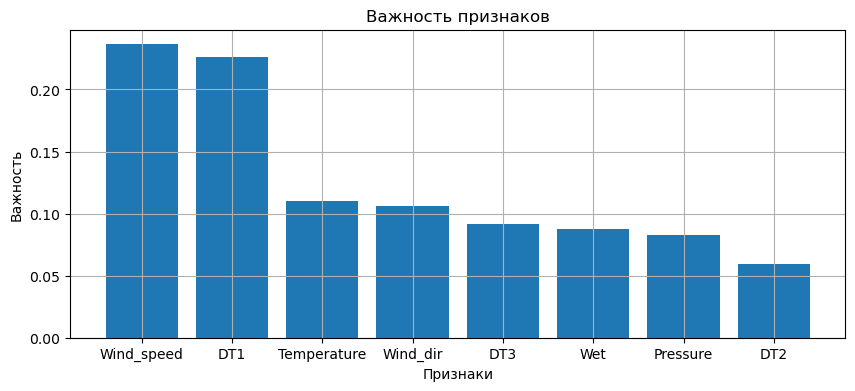

,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 208, 'subsample': 0.5}",,,
MSE,15.56,25.95,81.43
MAE,2.84,3.79,4.40
MAPE,0.32,0.46,0.48
R2,0.49,0.09,0.06


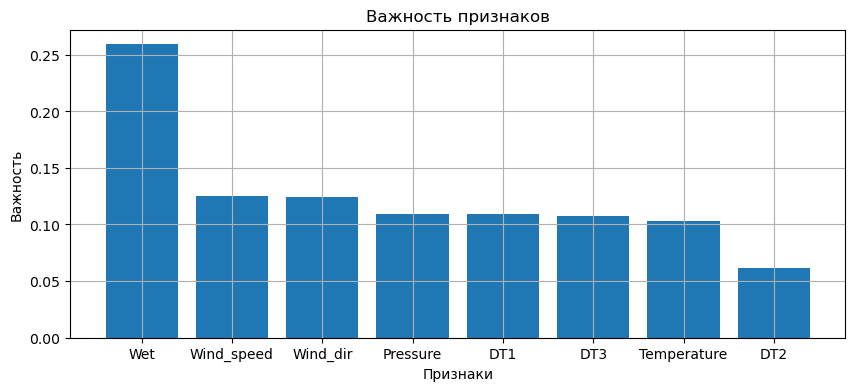

,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 406, 'subsample': 0.5}",,,
MSE,6.85,35.04,32.22
MAE,1.92,4.06,3.98
MAPE,0.24,0.52,0.41
R2,0.89,0.39,0.58


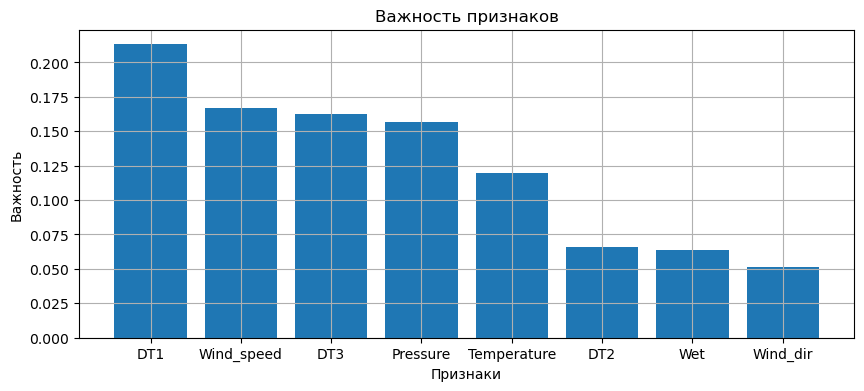

In [9]:
begin, end = '2019-01-01', '2024-03-19'

for season in ['winters', 'springs', 'summers', 'autumns']:
    ModelProcessing(model, sensor, fill, district, begin, end, seasonModel = season, season_test = season, params = params, gridSearch = True, paramDependencies = [], plotRes = False, featImp = True, savePath = 'Results/Results xgb_new.xlsx', sheet_name = 'По сезонам CV')

### Зима (сезонная модель)

In [57]:
params = { 
     'learning_rate': [0.01], 'max_depth': [4], 'n_estimators': [406], 'subsample': [0.5]
}

season = 'winters'

begin, end = '2019-01-01', '2024-03-19'

ModelProcessing(model, sensor, fill, district, begin, end, seasonModel = season, season_test = season, season_forecast = season, params = params, gridSearch = True, paramDependencies = [], plotRes = False, featImp = False, savePath = 'Results/Results xgb_new.xlsx', sheet_name = 'Зима прогноз')

,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 406, 'subsample': 0.5}",,,
MSE,179.69,895.19,356.85
MAE,9.53,21.42,14.04
MAPE,0.30,0.71,0.58
R2,0.92,0.61,0.83


ПРОГНОЗЫ:


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 406, 'subsample': 0.5}",,,
MSE,179.69,895.19,575.56
MAE,9.53,21.42,22.35
MAPE,0.30,0.71,0.21
R2,0.92,0.61,-4.43


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 406, 'subsample': 0.5}",,,
MSE,179.69,895.19,193.25
MAE,9.53,21.42,10.59
MAPE,0.30,0.71,0.76
R2,0.92,0.61,0.39


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 406, 'subsample': 0.5}",,,
MSE,179.69,895.19,96.64
MAE,9.53,21.42,8.72
MAPE,0.30,0.71,0.11
R2,0.92,0.61,0.90


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 406, 'subsample': 0.5}",,,
MSE,179.69,895.19,547.94
MAE,9.53,21.42,20.31
MAPE,0.30,0.71,0.13
R2,0.92,0.61,-11.08


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 406, 'subsample': 0.5}",,,
MSE,179.69,895.19,213.46
MAE,9.53,21.42,13.60
MAPE,0.30,0.71,0.92
R2,0.92,0.61,-1.75


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 406, 'subsample': 0.5}",,,
MSE,179.69,895.19,7.69
MAE,9.53,21.42,2.32
MAPE,0.30,0.71,0.47
R2,0.92,0.61,-1.57


### Весна (сезонная модель)

In [59]:
params =  {'learning_rate': [0.01], 'max_depth': [4], 'n_estimators': [802], 'subsample': [0.5]}

season = 'springs'
begin, end = '2019-01-01', '2024-03-19'

ModelProcessing(model, sensor, fill, district, begin, end, seasonModel = season, season_test = season, season_forecast = season, params = params, gridSearch = True, paramDependencies = [], plotRes = False, featImp = False, savePath = 'Results/Results xgb_new.xlsx', sheet_name = 'Весна прогноз')

,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 802, 'subsample': 0.5}",,,
MSE,7.30,56.23,51.32
MAE,2.05,5.65,5.15
MAPE,0.19,0.48,0.34
R2,0.94,0.53,0.70


ПРОГНОЗЫ:


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 802, 'subsample': 0.5}",,,
MSE,7.30,56.23,84.84
MAE,2.05,5.65,8.21
MAPE,0.19,0.48,1.05
R2,0.94,0.53,-60.90


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 802, 'subsample': 0.5}",,,
MSE,7.30,56.23,15.05
MAE,2.05,5.65,3.19
MAPE,0.19,0.48,0.26
R2,0.94,0.53,0.19


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 802, 'subsample': 0.5}",,,
MSE,7.30,56.23,27.58
MAE,2.05,5.65,4.45
MAPE,0.19,0.48,0.24
R2,0.94,0.53,0.47


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 802, 'subsample': 0.5}",,,
MSE,7.30,56.23,126.81
MAE,2.05,5.65,7.33
MAPE,0.19,0.48,0.54
R2,0.94,0.53,0.17


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 802, 'subsample': 0.5}",,,
MSE,7.30,56.23,0.62
MAE,2.05,5.65,0.63
MAPE,0.19,0.48,0.15
R2,0.94,0.53,-4.06


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 802, 'subsample': 0.5}",,,
MSE,7.30,56.23,1182.66
MAE,2.05,5.65,33.46
MAPE,0.19,0.48,0.49
R2,0.94,0.53,-24.47


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 802, 'subsample': 0.5}",,,
MSE,7.30,56.23,29.04
MAE,2.05,5.65,3.77
MAPE,0.19,0.48,0.54
R2,0.94,0.53,-487.27


### Лето (по годам)

In [60]:
params =  {'learning_rate': [0.01], 'max_depth': [4], 'n_estimators': [208], 'subsample': [1.0]}

season = 'summers'
begin, end = '2023-01-01', '2024-03-19'

ModelProcessing(model, sensor, fill, district, begin, end, seasonModel = '', season_test = season, season_forecast = season, params = params, gridSearch = True, paramDependencies = [], plotRes = False, featImp = False, savePath = 'Results/Results xgb_new.xlsx', sheet_name = 'Лето прогноз')

,Train,CV,Test
"2023-01-02 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 208, 'subsample': 1.0}",,,
MSE,108.52,541.37,82.93
MAE,6.22,12.71,4.56
MAPE,0.31,0.50,0.48
R2,0.92,0.27,0.04


ПРОГНОЗЫ:


,Train,CV,Test
"2023-01-02 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 208, 'subsample': 1.0}",,,
MSE,108.52,541.37,32.83
MAE,6.22,12.71,5.02
MAPE,0.31,0.50,0.42
R2,0.92,0.27,-3.31


,Train,CV,Test
"2023-01-02 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 208, 'subsample': 1.0}",,,
MSE,108.52,541.37,1.80
MAE,6.22,12.71,0.85
MAPE,0.31,0.50,0.08
R2,0.92,0.27,0.09


,Train,CV,Test
"2023-01-02 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 208, 'subsample': 1.0}",,,
MSE,108.52,541.37,8.33
MAE,6.22,12.71,2.71
MAPE,0.31,0.50,0.83
R2,0.92,0.27,-1.52


,Train,CV,Test
"2023-01-02 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 208, 'subsample': 1.0}",,,
MSE,108.52,541.37,5.60
MAE,6.22,12.71,2.36
MAPE,0.31,0.50,0.35
R2,0.92,0.27,0.19


,Train,CV,Test
"2023-01-02 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 208, 'subsample': 1.0}",,,
MSE,108.52,541.37,11.84
MAE,6.22,12.71,3.39
MAPE,0.31,0.50,0.54
R2,0.92,0.27,-0.27


,Train,CV,Test
"2023-01-02 — 2024-03-16 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 208, 'subsample': 1.0}",,,
MSE,108.52,541.37,1.95
MAE,6.22,12.71,1.18
MAPE,0.31,0.50,0.18
R2,0.92,0.27,-1.23


### Осень (по годам)

In [58]:
params =  {'learning_rate': [0.1], 'max_depth': [4], 'n_estimators': [208], 'subsample': [1.0]}

season = 'autumns'
begin, end = '2019-01-01', '2024-03-19'

ModelProcessing(model, sensor, fill, district, begin, end, seasonModel = '', season_test = season, season_forecast = season, params = params, gridSearch = True, paramDependencies = [], plotRes = False, featImp = False, savePath = 'Results/Results xgb_new.xlsx', sheet_name = 'Осень прогноз')

,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 208, 'subsample': 1.0}",,,
MSE,33.21,343.84,21.85
MAE,3.91,11.35,3.77
MAPE,0.30,0.78,0.44
R2,0.97,0.67,0.71


ПРОГНОЗЫ:


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 208, 'subsample': 1.0}",,,
MSE,33.21,343.84,268.19
MAE,3.91,11.35,11.12
MAPE,0.30,0.78,0.86
R2,0.97,0.67,-96.15


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 208, 'subsample': 1.0}",,,
MSE,33.21,343.84,44.64
MAE,3.91,11.35,6.32
MAPE,0.30,0.78,0.69
R2,0.97,0.67,-5.79


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 208, 'subsample': 1.0}",,,
MSE,33.21,343.84,7.77
MAE,3.91,11.35,2.61
MAPE,0.30,0.78,0.61
R2,0.97,0.67,-0.07


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 208, 'subsample': 1.0}",,,
MSE,33.21,343.84,22.31
MAE,3.91,11.35,4.49
MAPE,0.30,0.78,0.45
R2,0.97,0.67,-976.59


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 208, 'subsample': 1.0}",,,
MSE,33.21,343.84,6.53
MAE,3.91,11.35,2.42
MAPE,0.30,0.78,0.43
R2,0.97,0.67,-1.16


,Train,CV,Test
"2019-01-01 — 2024-03-16 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 208, 'subsample': 1.0}",,,
MSE,33.21,343.84,8.46
MAE,3.91,11.35,2.49
MAPE,0.30,0.78,0.44
R2,0.97,0.67,-1.38
